In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=np.loadtxt('data/ex1data2.txt',delimiter=',',dtype=np.int64)
X=data[:,0:2]
y=data[:,2]
m=y.size

In [3]:
X.shape

(47, 2)

In [4]:
y.shape

(47,)

In [5]:
def feature_normalize(X):
    n=X.shape[1]
    X_norm=X
    mu=np.zeros(n)
    sigma=np.zeros(n)
    
    mu=np.mean(X,0)
    sigma=np.std(X,0,ddof=1)
    X_norm=(X-mu)/sigma
    
    return X_norm,mu,sigma

In [6]:
X,mu,sigma=feature_normalize(X)
X=np.c_[np.ones(m),X]       #Add a column of ones to X

In [7]:
def compute_cost(X,y,theta):
    m=y.size
    cost=0
    cost=np.sum((np.dot(X,theta) - y) ** 2) / (2 * m)
    
    return cost

In [8]:
def gradient_descent_multi(X,y,theta,alpha,num_iters):
    # Initial some useful values  为什么要初始化，不是很懂
    m=y.size
    J_history=np.zeros(num_iters)
    
    for i in range(0,num_iters):
        error=np.dot(X,theta).flatten() - y     #对于每一次迭代，都会用所有的X和theta计算一次。
        theta -= (alpha/m) * np.sum(X * error[:,np.newaxis],axis=0)         #np.newaxis为多维数组增加一个轴
        
        J_history[i]=compute_cost(X,y,theta)
    return theta,J_history,error

In [9]:
alpha=0.01
num_iters=1500

In [10]:
theta=np.zeros(3)
theta,J_history,error=gradient_descent_multi(X,y,theta,alpha,num_iters)

Text(0,0.5,'Cost J')

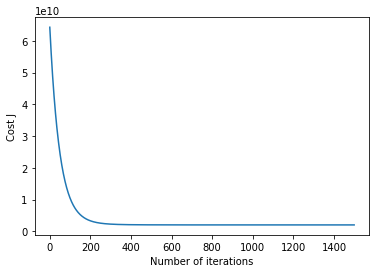

In [11]:
plt.figure()
plt.plot(np.arange(J_history.size), J_history)
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')

In [12]:
def plotConvergence(jvec):
    plt.figure(figsize=(10,6))
    plt.plot(range(len(jvec)),jvec,'bo')
    plt.grid(True)
    plt.title('Convergence of cost function')
    plt.xlabel('Iteration number')
    plt.ylabel('cost function')
    dummy=plt.xlim([-0.05*num_iters,1.05*num_iters])

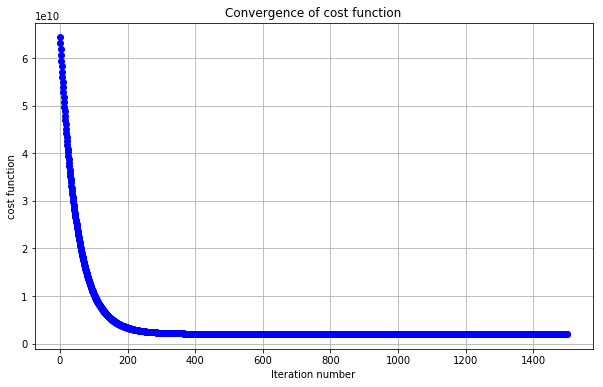

In [13]:
plotConvergence(J_history)
# dummy=plt.ylim([4,7])   做了特征缩放之后，就用不到这一步了